In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("Smart_Phone_Dataset.csv")
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"?54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2?GHz Processor","12?GB RAM, 256?GB inbuilt",5000?mAh Battery with 100W Fast Charging,"6.7 inches, 1440?x?3216?px, 120 Hz Display wit...",50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"?19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 33W Fast Charging,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",64?MP + 2?MP + 2?MP Triple Rear & 16?MP Front ...,"Memory Card (Hybrid), upto 1?TB",Android v12
2,Samsung Galaxy A14 5G,"?16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4?GHz Processor","4?GB RAM, 64?GB inbuilt",5000?mAh Battery with 15W Fast Charging,"6.6 inches, 1080?x?2408?px, 90 Hz Display with...",50?MP + 2?MP + 2?MP Triple Rear & 13?MP Front ...,"Memory Card Supported, upto 1?TB",Android v13
3,Motorola Moto G62 5G,"?14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with Fast Charging,"6.55 inches, 1080?x?2400?px, 120 Hz Display wi...",50?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...,"Memory Card (Hybrid), upto 1?TB",Android v12
4,Realme 10 Pro Plus,"?24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 67W Fast Charging,"6.7 inches, 1080?x?2412?px, 120 Hz Display wit...",108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,Memory Card Not Supported,Android v13


In [3]:
df.isnull().sum()

model          1
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [4]:
df.dropna(subset = ['os'], inplace=True)
df.dropna(subset = ['card'], inplace = True)
df.dropna(subset = ['camera'], inplace = True)
df.dropna(subset = ['rating'], inplace = True)
df.isnull().sum()

model        1
price        0
rating       0
sim          0
processor    0
ram          0
battery      0
display      0
camera       0
card         0
os           0
dtype: int64

Text(0, 0.5, 'Count of Mobile OS Model')

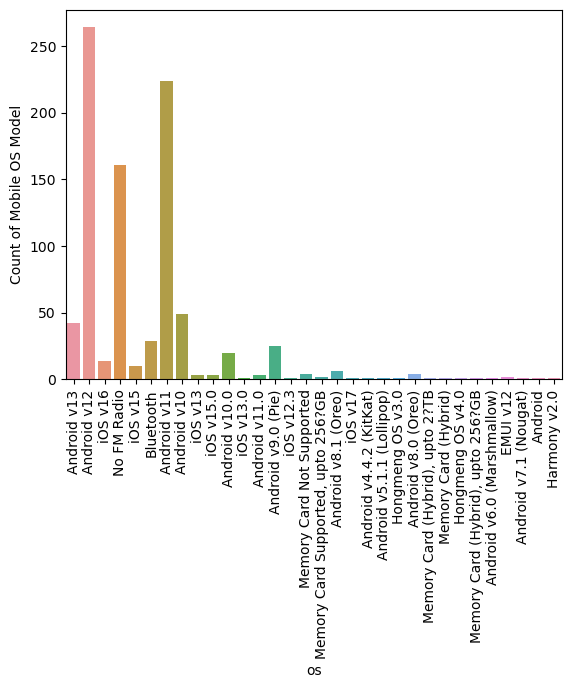

In [5]:
plt.xticks(rotation=90, fontsize=10)
sns.countplot(x= df['os'], data=df)
plt.ylabel('Count of Mobile OS Model')

In [6]:
#create new dataframe
data = pd.DataFrame()
#splitting data inorder to categorize easily and appending it to the new dataframe

In [7]:
new_col = df['display'].apply(lambda x: x.split(','))
data['screen_length'] = new_col.apply(lambda x: x[0])
data['pixels'] = new_col.apply(lambda x: x[-1])

In [8]:
split_processor_col = df['processor'].apply(lambda x: x.split(','))
data['processor_name'] = split_processor_col.apply(lambda x: x[0])
processor = data['processor_name'].apply(lambda x: x.split(' '))

In [9]:
data['processor'] = processor.apply(lambda x: x[0])
data['core'] = split_processor_col.apply(lambda x: x[-1])


In [10]:
split_mobile_name = df['model'].astype(str).str.split()
data['mobile_model'] = split_mobile_name.apply(lambda x: x[0])

In [11]:
data['mobile_model'] = data['mobile_model'].replace({'poco': 'POCO'})
data['model_spec_name'] = split_mobile_name.apply(lambda x: ''.join(x[1:]))

In [12]:
data['price'] = df['price'].apply(lambda x: int(''.join(x[1:].split(','))))

In [13]:
data['os'] = df['os']
data['battery'] = df['battery']
data['card'] = df['card']
data['camera'] = df['camera']
data['sim'] = df['sim']
data['rating'] = df['rating']
ram = df['ram'].apply(lambda x: x.split(','))
data['ram'] = ram.apply(lambda x: x[0])
data['rom'] = ram.apply(lambda x: x[-1])


In [14]:
data.columns

Index(['screen_length', 'pixels', 'processor_name', 'processor', 'core',
       'mobile_model', 'model_spec_name', 'price', 'os', 'battery', 'card',
       'camera', 'sim', 'rating', 'ram', 'rom'],
      dtype='object')

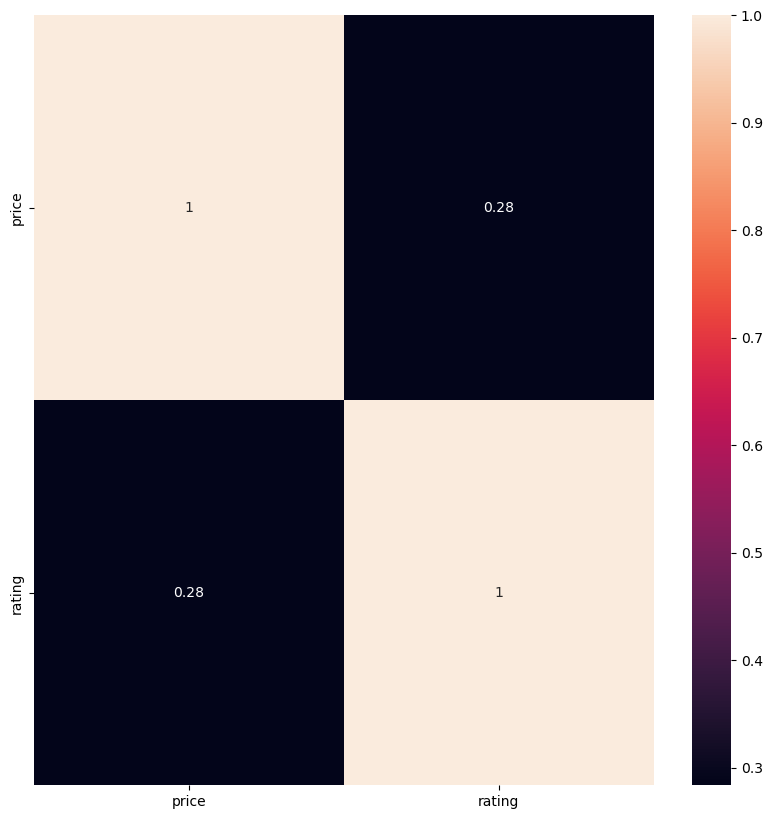

In [15]:
num_cols = ['screen_length', 'pixels', 'processor_name', 'processor', 'core',
       'mobile_model', 'model_spec_name', 'price', 'os', 'battery', 'card',
       'camera', 'sim', 'rating', 'ram', 'rom']

data.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot=True,ax=ax)
plt.show()

#### Count Mobile Brands

Text(0, 0.5, 'Count of Mobile model')

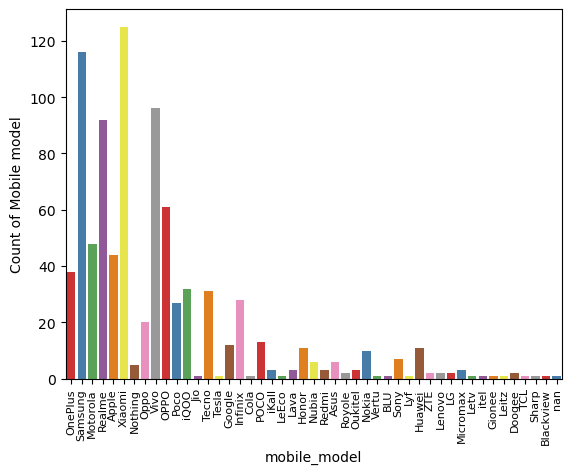

In [16]:
plt.xticks(rotation=90, fontsize=8)
sns.countplot(x= data['mobile_model'], data=data, palette = "Set1")
plt.ylabel('Count of Mobile model')

#### Average Price of Mobile based on Model

In [17]:
average_cost = data.groupby(['mobile_model'])['price'].mean().reset_index()
fig = px.bar(average_cost, x='mobile_model', y='price', labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Price of Mobiles'},
             title='Average Price of Mobiles', color = 'mobile_model')
fig.show()

#### Highest Price Mobile

In [18]:
total_cost = data.groupby(['mobile_model'])['price'].sum().reset_index()
fig = px.bar(total_cost, x='mobile_model', y='price', labels={'Mobile_Model': 'mobile_model', 'Name': 'Total Price of Mobiles'},
             title='Total Price of Mobiles', color = 'mobile_model')
fig.show()

#### Categorized Based on Count of Mobile Processor

Text(0.5, 0, 'Processor Name')

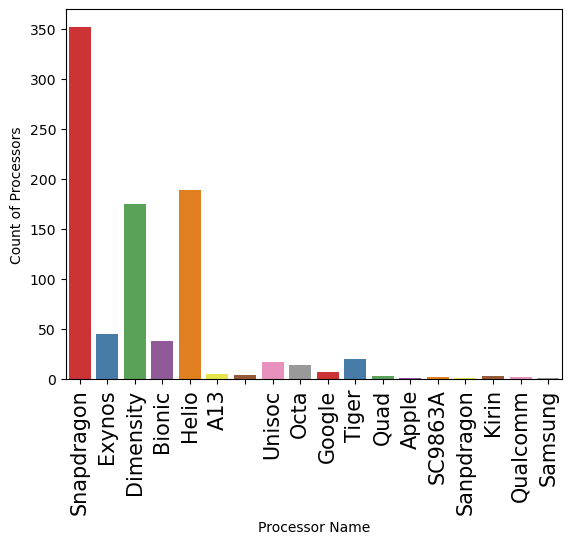

In [19]:
plt.xticks(rotation=90, fontsize=15)
sns.countplot(x= data['processor'], data=data, palette = "Set1")
plt.ylabel('Count of Processors')
plt.xlabel('Processor Name')

#### Highest Rated Mobiles

In [20]:
highest_rating = data.groupby(['mobile_model'])['rating'].sum().reset_index()
fig = px.bar(highest_rating, x='mobile_model', y='rating', labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Rating of Mobiles'},
             title='Average Rating of Mobiles', color = 'mobile_model')
fig.show()

#### Average Count of Mobile Sim Type

In [21]:
average_count = data['sim'].value_counts(sort=False)
fig = px.bar(average_count, x='sim', y = average_count.index, labels={'Mobile_Model': 'mobile_model', 'Name': 'Average Count of Sim Type'},
             title='Average Count of Sim Type', color = 'sim')
fig.show()

#### Percentage of RAM

In [22]:
percentage_ram = data['ram'].value_counts()
fig = px.pie(percentage_ram, values=percentage_ram.values, names=percentage_ram.index)
fig = go.Figure(data=[go.Pie(labels=percentage_ram.index, values=percentage_ram.values)])
fig.update_layout(legend={'font': {'size': 15}, })
fig.update_layout(
    width=900,
    height=500
)
fig.show()

#### Percentage of ROM

In [23]:
percentage_rom = data['rom'].value_counts()
fig = px.pie(percentage_rom, values=percentage_rom.values, names=percentage_rom.index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

#### Processor Count for Each Mobile Brand

In [24]:
fig=px.histogram(data,x="mobile_model",color="processor",title="Count of Processor for every mobile brand",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1400, height=500)
fig.update_layout(title_font_size=20, yaxis_title= 'Count of Processor')
fig.show()

#### Count of Camera Fixtures for Each Model

In [25]:
fig=px.histogram(data,x="mobile_model",color="camera",title="Count of Camera Fixtures for every mobile brand",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1400, height=800)
fig.update_layout(title_font_size=20, yaxis_title= 'Count of Camera Fixtures')
fig.show()

In [31]:
Heatmap_data = pd.read_csv('smartphone_data_cleaned.csv')
Heatmap_data

,screen_length_inches,pixels,processor_name,processor,core,mobile_model,model_spec_name,price,os,battery,card,camera,sim,rating,ram,rom
0,6.70,120 Hz Display with Punch Hole,Snapdragon 8 Gen2,Snapdragon,3.2?GHz Processor,OnePlus,115G,54999,Android v13,5000?mAh Battery with 100W Fast Charging,Memory Card Not Supported,50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",89,12,256
1,6.59,120 Hz Display with Punch Hole,Snapdragon 695,Snapdragon,2.2?GHz Processor,OnePlus,NordCE2Lite5G,19989,Android v12,5000?mAh Battery with 33W Fast Charging,"Memory Card (Hybrid), upto 1?TB",64?MP + 2?MP + 2?MP Triple Rear & 16?MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",81,6,128
2,6.60,90 Hz Display with Water Drop Notch,Exynos 1330,Exynos,2.4?GHz Processor,Samsung,GalaxyA145G,16499,Android v13,5000?mAh Battery with 15W Fast Charging,"Memory Card Supported, upto 1?TB",50?MP + 2?MP + 2?MP Triple Rear & 13?MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",75,4,64
3,6.55,120 Hz Display with Punch Hole,Snapdragon 695,Snapdragon,2.2?GHz Processor,Motorola,MotoG625G,14999,Android v12,5000?mAh Battery with Fast Charging,"Memory Card (Hybrid), upto 1?TB",50?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",81,6,128
4,6.70,120 Hz Display with Punch Hole,Dimensity 1080,Dimensity,2.6?GHz Processor,Realme,10ProPlus,24999,Android v13,5000?mAh Battery with 67W Fast Charging,Memory Card Not Supported,108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",82,6,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,6.67,120 Hz Display with Punch Hole,Snapdragon 8 Gen1,Snapdragon,3?GHz Processor,Motorola,MotoEdgeS30Pro,34990,No FM Radio,5000?mAh Battery with 68.2W Fast Charging,Android v12,64?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",83,8,128
864,6.50,720?x?1600?px Display with Water Drop Notch,Snapdragon 480+,Snapdragon,2.2?GHz Processor,Honor,X85G,14990,Android v11,5000?mAh Battery with 22.5W Fast Charging,"Memory Card Supported, upto 1?TB",48?MP + 2?MP + Depth Sensor Triple Rear & 8?MP...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",75,6,128
865,6.60,144 Hz Display with Punch Hole,Dimensity 8100,Dimensity,2.85?GHz Processor,POCO,X4GT5G(8GBRAM+256GB),28990,Android v12,5080?mAh Battery with 67W Fast Charging,Memory Card Not Supported,64?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",85,8,256
866,6.80,1080?x?2400?px Display with Punch Hole,Snapdragon 695,Snapdragon,2.2?GHz Processor,Motorola,MotoG915G,19990,Android v12,5000?mAh Battery with Fast Charging,"Memory Card Supported, upto 1?TB",108?MP + 8?MP + 2?MP Triple Rear & 32?MP Front...,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",80,6,128


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ['screen_length_inches','rating', 'ram', 'rom']
# Convert selected columns to float data type
Heatmap_data[selected_columns] = Heatmap_data[selected_columns].astype(float)


In [34]:
# Create a correlation matrix
correlation_matrix = Heatmap_data[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>